# Project

In [1]:
import pandas as pd

In [2]:
# from google.colab import files
# uploaded = files.upload()

## Initial data cleaning with raw data

In [3]:
df = pd.read_csv('auto24_cars_raw.csv')

In [4]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset has 15612 rows and 12 columns

Column names:
['url', 'brand', 'first_reg', 'type', 'body_type', 'engine', 'fuel', 'mileage', 'drive_type', 'gearbox', 'color', 'price']

First 5 rows:
                                      url                   brand  first_reg  \
0  https://www.auto24.ee/soidukid/4098580     Toyota Land Cruiser     1992.0   
1  https://www.auto24.ee/soidukid/4095518              Opel Corsa     2008.0   
2  https://www.auto24.ee/soidukid/4241916               Saab 9000     1992.0   
3  https://www.auto24.ee/soidukid/4215960  Fiat Albea Comfort LPG     2008.0   
4  https://www.auto24.ee/soidukid/4239545              Ford Focus     2007.0   

        type   body_type     engine                            fuel   mileage  \
0    maastur  universaal  4.2 123kW                          diisel  464000.0   
1  sõiduauto    luukpära   1.2 59kW                         bensiin  180000.0   
2  sõiduauto    luukpära  2.3 110kW                         bensiin  305698.0   
3  s

In [5]:
# Before removing duplicates
print(f"Original rows: {len(df)}")

# Remove duplicates
df = df.drop_duplicates(subset=['url'])

# After removing duplicates
print(f"Rows after removing duplicates: {len(df)}")

Original rows: 15612
Rows after removing duplicates: 14767


In [6]:
# Before removing
print(f"Original rows: {len(df)}")

# Remove rows with any missing values
df = df.dropna()

# After removing
print(f"Rows after removing missing values: {len(df)}")

Original rows: 14767
Rows after removing missing values: 13826


In [7]:
#Translate
df['type'] = df['type'].replace('maastur', 'suv')
df['type'] = df['type'].replace('sõiduauto', 'passenger')


In [8]:
# Split by whitespace and take the first word
df['body_type'] = df['body_type'].str.split().str[0]

In [9]:
df['body_type'] = df['body_type'].replace('sedaan', 'sedan')
df['body_type'] = df['body_type'].replace('universaal', 'touring')
df['body_type'] = df['body_type'].replace('luukpära', 'hatchback')
df['body_type'] = df['body_type'].replace('mahtuniversaal', 'minivan')
df['body_type'] = df['body_type'].replace('kabriolett', 'cabriolet')
df['body_type'] = df['body_type'].replace('pikap', 'pickup')
df['body_type'] = df['body_type'].replace('kupee', 'coupe')
df['body_type'] = df['body_type'].replace('lahtine', 'open')
df['body_type'] = df['body_type'].replace('limusiin', 'limousine')

In [10]:
df['fuel'] = df['fuel'].replace('bensiin + gaas (LPG/vedelgaas)', 'bensiin + gaas')
df['fuel'] = df['fuel'].replace('bensiin + gaas (CNG/surugaas)', 'bensiin + gaas')
df['fuel'] = df['fuel'].replace('hübriid (bensiin / elekter)', 'hübriid')
df['fuel'] = df['fuel'].replace('hübriid (diisel / elekter)', 'hübriid')
df['fuel'] = df['fuel'].replace('gaas (CNG/surugaas)', 'gaas')
df['fuel'] = df['fuel'].replace('gaas (LPG/vedelgaas)', 'gaas')
df['fuel'] = df['fuel'].replace('pistikhübriid (diisel / elekter)', 'pistikhübriid')
df['fuel'] = df['fuel'].replace('pistikhübriid (bensiin / elekter)', 'pistikhübriid')

In [11]:
df['fuel'] = df['fuel'].replace('diisel', 'diesel')
df['fuel'] = df['fuel'].replace('bensiin', 'petrol')
df['fuel'] = df['fuel'].replace('bensiin + gaas', 'petrol + gas')
df['fuel'] = df['fuel'].replace('hübriid', 'hybrid')
df['fuel'] = df['fuel'].replace('elekter', 'electric')
df['fuel'] = df['fuel'].replace('gaas', 'gas')
df['fuel'] = df['fuel'].replace('pistikhübriid', 'plug-in hybrid')
df['fuel'] = df['fuel'].replace('vesinik', 'hydrogen')
df['fuel'] = df['fuel'].replace('etanool', 'ethanol')

In [12]:
df['drive_type'] = df['drive_type'].replace('nelikvedu', 'four-wheel drive')
df['drive_type'] = df['drive_type'].replace('esivedu', 'front-wheel drive')
df['drive_type'] = df['drive_type'].replace('tagavedu', 'rear-wheel drive')

In [13]:
df['gearbox'] = df['gearbox'].str.split().str[0]

In [14]:
# Remove rows where gearbox equals '(Konstantne'
df = df[df['gearbox'] != '(konstantne']
df = df[df['gearbox'] != '(Konstantne']

In [15]:
df['color'] = df['color'].str.split().str[0]

In [16]:
# Create translation dictionary
color_translation = {
    'punane': 'red',
    'must': 'black',
    'valge': 'white',
    'helesinine': 'light blue',
    'hõbedane': 'silver',
    'roheline': 'green',
    'heleroheline': 'light green',
    'hall': 'gray',
    'tumehall': 'dark gray',
    'beež': 'beige',
    'sinine': 'blue',
    'lilla': 'purple',
    'pruun': 'brown',
    'tumepunane': 'dark red',
    'oranž': 'orange',
    'helehall': 'light gray',
    'tumesinine': 'dark blue',
    'tumeroheline': 'dark green',
    'helebeež': 'light beige',
    'kollane': 'yellow',
    'kuldne': 'gold',
    'helepruun': 'light brown',
    'tumepruun': 'dark brown',
    'tumeoranž': 'dark orange',
    'helekollane': 'light yellow',
    'tumelilla': 'dark purple',
    'tumebeež': 'dark beige',
    'roosa': 'pink',
    'Gold': 'gold',
    'helepunane': 'light red',
    'Bentayga': 'Bentayga',  # Model name, not a color
    'Rose': 'rose'
}

# Replace values
df['color'] = df['color'].replace(color_translation)

In [17]:
df = df[df['color'] != 'Bentayga']


In [18]:
# Count spaces in brand column
space_count = df['brand'].str.count(' ')

# Create model column
df['model'] = None

# Only split where there's exactly 1 space (2 words)
mask = space_count == 1

# Split and assign for rows with exactly 1 space
df.loc[mask, 'model'] = df.loc[mask, 'brand'].str.split(' ').str[1]
df.loc[mask, 'brand'] = df.loc[mask, 'brand'].str.split(' ').str[0]

In [19]:
# Get the column index of 'brand'
brand_index = df.columns.get_loc('brand')

# Reorder columns - insert model right after brand
cols = df.columns.tolist()
cols.remove('model')
cols.insert(brand_index + 1, 'model')
df = df[cols]

In [20]:
df['brand'].unique()

array(['Toyota Land Cruiser', 'Opel', 'Saab', ..., 'Ferrari SF90 Spider',
       'Lamborghini Aventador Ultimae 1/350',
       'BMW 750 Ld M-Packet XDrive'], dtype=object)

In [21]:
df = df[df['brand'] != 'Land']
df = df[df['brand'] != 'MCC']

In [22]:
# Create mask for rows containing 'Land Rover'
land_rover_mask = df['brand'].str.contains('Land Rover', na=False)

# For Land Rover rows, extract everything after 'Land Rover'
df.loc[land_rover_mask, 'model'] = df.loc[land_rover_mask, 'brand'].str.replace('Land Rover', '', n=1).str.strip()

# Set brand to 'Land Rover' for those rows
df.loc[land_rover_mask, 'brand'] = 'Land Rover'

In [23]:
land_rover_mask = df['brand'].str.contains('Alfa Romeo', na=False)

df.loc[land_rover_mask, 'model'] = df.loc[land_rover_mask, 'brand'].str.replace('Alfa Romeo', '', n=1).str.strip()

df.loc[land_rover_mask, 'brand'] = 'Alfa Romeo'

In [24]:
land_rover_mask = df['brand'].str.contains('Aston Martin', na=False)

df.loc[land_rover_mask, 'model'] = df.loc[land_rover_mask, 'brand'].str.replace('Aston Martin', '', n=1).str.strip()

df.loc[land_rover_mask, 'brand'] = 'Aston Martin'

In [25]:
# Create mask for rows with at least 2 spaces
mask = df['brand'].str.count(' ') >= 2

# For these rows, split on first space only
# First word goes to brand, everything else to model
df.loc[mask, 'model'] = df.loc[mask, 'brand'].str.split(' ', n=1).str[1]
df.loc[mask, 'brand'] = df.loc[mask, 'brand'].str.split(' ', n=1).str[0]

In [26]:
# Count occurrences of each brand
brand_counts = df['brand'].value_counts()

# Get brands that appear more than once
brands_to_keep = brand_counts[brand_counts > 10].index

# Keep only rows with brands that appear more than once
df = df[df['brand'].isin(brands_to_keep)]

In [27]:
# Create mask for models with more than 2 words (at least 2 spaces)
mask = df['model'].str.count(' ') >= 2

# Keep only first 2 words for those rows
df.loc[mask, 'model'] = df.loc[mask, 'model'].str.split(' ', n=2).str[:2].str.join(' ')

In [28]:
df['model'] = df['model'].apply(
    lambda x: x if pd.isna(x) or 'Land Cruiser' in str(x) else str(x).split()[0]
)

In [29]:
model_counts = df['model'].value_counts()

models_to_keep = model_counts[model_counts > 10].index

df = df[df['model'].isin(models_to_keep)]

In [30]:
df['engine_size'] = df['engine'].str.extract(r'^([\d.]+)')[0]
df['power'] = df['engine'].str.extract(r'(\d+kW)')[0]
df['power'] = df['power'].str.replace('kW', '')
df.drop('engine', axis=1, inplace=True)

In [31]:
df.head()

,url,brand,model,first_reg,type,body_type,fuel,mileage,drive_type,gearbox,color,price,engine_size,power
0,https://www.auto24.ee/soidukid/4098580,Toyota,Land Cruiser,1992.0,suv,touring,diesel,464000.0,four-wheel drive,manuaal,red,19.0,4.2,123
1,https://www.auto24.ee/soidukid/4095518,Opel,Corsa,2008.0,passenger,hatchback,petrol,180000.0,front-wheel drive,automaat,black,300.0,1.2,59
4,https://www.auto24.ee/soidukid/4239545,Ford,Focus,2007.0,passenger,touring,diesel,287000.0,front-wheel drive,manuaal,silver,399.0,1.8,85
5,https://www.auto24.ee/soidukid/4197828,Honda,Accord,2008.0,passenger,minivan,petrol,402000.0,front-wheel drive,manuaal,silver,399.0,2.0,114
7,https://www.auto24.ee/soidukid/4204313,Renault,Scenic,2001.0,passenger,hatchback,petrol,222000.0,front-wheel drive,manuaal,light green,399.0,1.4,70


In [32]:
# df.loc[df['model'].str.startswith('Outlander', na=False), 'model'] = 'Outlander'
# df.loc[df['model'].str.startswith('Pacifica', na=False), 'model'] = 'Pacifica'
# df.loc[df['model'].str.startswith('Passat', na=False), 'model'] = 'Passat'
# df.loc[df['model'].str.startswith('e-tron', na=False), 'model'] = 'e-tron'
# df.loc[df['model'].str.startswith('Z3', na=False), 'model'] = 'Z3'
# df.loc[df['model'].str.startswith('Z4', na=False), 'model'] = 'Z4'
# df.loc[df['model'].str.startswith('ZR-V', na=False), 'model'] = 'ZR-V'
# df.loc[df['model'].str.startswith('Zafira', na=False), 'model'] = 'Zafira'
# df.loc[df['model'].str.startswith('Yaris', na=False), 'model'] = 'Yaris'
# df.loc[df['model'].str.startswith('Zoe', na=False), 'model'] = 'Zoe'
# df.loc[df['model'].str.startswith('Yeti', na=False), 'model'] = 'Yeti'
# df.loc[df['model'].str.startswith('bZ4X', na=False), 'model'] = 'bZ4X'
# df.loc[df['model'].str.startswith('i10', na=False), 'model'] = 'i10'
# df.loc[df['model'].str.startswith('i20', na=False), 'model'] = 'i20'
# df.loc[df['model'].str.startswith('i3', na=False), 'model'] = 'i3'
# df.loc[df['model'].str.startswith('i30', na=False), 'model'] = 'i30'
# df.loc[df['model'].str.startswith('i40', na=False), 'model'] = 'i40'
# df.loc[df['model'].str.startswith('ix35', na=False), 'model'] = 'ix35'
# df.loc[df['model'].str.startswith('iX3', na=False), 'model'] = 'iX3'
# df.loc[df['model'].str.startswith('iX2', na=False), 'model'] = 'iX2'
# df.loc[df['model'].str.startswith('iX', na=False), 'model'] = 'iX'
# df.loc[df['model'].str.startswith('i8', na=False), 'model'] = 'i8'
# df.loc[df['model'].str.startswith('i7', na=False), 'model'] = 'i7'
# df.loc[df['model'].str.startswith('i5', na=False), 'model'] = 'i5'
# df.loc[df['model'].str.startswith('i4', na=False), 'model'] = 'i4'
# df.loc[df['model'].str.startswith('cee\'d', na=False), 'model'] = 'ceed'
# df.loc[df['model'].str.startswith('XC90', na=False), 'model'] = 'XC90'
# df.loc[df['model'].str.startswith('XC70', na=False), 'model'] = 'XC70'
# df.loc[df['model'].str.startswith('XC60', na=False), 'model'] = 'XC60'
# df.loc[df['model'].str.startswith('XC40', na=False), 'model'] = 'XC40'
# df.loc[df['model'].str.startswith('XCeed', na=False), 'model'] = 'XCeed'
# df.loc[df['model'].str.startswith('XV', na=False), 'model'] = 'XV'
# df.loc[df['model'].str.startswith('XJ', na=False), 'model'] = 'XJ'
# df.loc[df['model'].str.startswith('XKR', na=False), 'model'] = 'XKR'
# df.loc[df['model'].str.startswith('XM', na=False), 'model'] = 'XM'
# df.loc[df['model'].str.startswith('Xsara', na=False), 'model'] = 'Xsara'
# df.loc[df['model'].str.startswith('X1', na=False), 'model'] = 'X1'
# df.loc[df['model'].str.startswith('X2', na=False), 'model'] = 'X2'
# df.loc[df['model'].str.startswith('X3', na=False), 'model'] = 'X3'
# df.loc[df['model'].str.startswith('X4', na=False), 'model'] = 'X4'
# df.loc[df['model'].str.startswith('X5', na=False), 'model'] = 'X5'
# df.loc[df['model'].str.startswith('X6', na=False), 'model'] = 'X6'
# df.loc[df['model'].str.startswith('X7', na=False), 'model'] = 'X7'
# df.loc[df['model'].str.startswith('XF', na=False), 'model'] = 'XF'

## Exploratory Data Analysis (EDA)

In [33]:
print(f"Dataset shape at this point: {df.shape}")

Dataset shape at this point: (11934, 14)


In [34]:
import numpy as np
import re

print("\n📊 --- Basic Info ---")
df.info()
print("\nMissing values per column:")
print(df.isna().sum())


📊 --- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 11934 entries, 0 to 14864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          11934 non-null  object 
 1   brand        11934 non-null  object 
 2   model        11934 non-null  object 
 3   first_reg    11934 non-null  float64
 4   type         11934 non-null  object 
 5   body_type    11934 non-null  object 
 6   fuel         11934 non-null  object 
 7   mileage      11934 non-null  float64
 8   drive_type   11934 non-null  object 
 9   gearbox      11934 non-null  object 
 10  color        11934 non-null  object 
 11  price        11934 non-null  float64
 12  engine_size  11897 non-null  object 
 13  power        11882 non-null  object 
dtypes: float64(3), object(11)
memory usage: 1.4+ MB

Missing values per column:
url             0
brand           0
model           0
first_reg       0
type            0
body_type       0
fuel         

In [35]:
# how many unique values for each column?
df.nunique()

,0
url,11934
brand,41
model,247
first_reg,49
type,2
body_type,9
fuel,7
mileage,5432
drive_type,3
gearbox,3


In [36]:
# statistics for numerical columns in our dataset
df. describe()

,first_reg,mileage,price
count,11934.000000,1.193400e+04,11934.000000
mean,2016.156863,1.643173e+05,23728.448718
std,6.407791,1.185975e+05,25266.553329
min,1966.000000,1.000000e+00,19.000000
25%,2012.000000,7.435275e+04,8400.000000
50%,2017.000000,1.540000e+05,17290.000000
75%,2021.000000,2.410000e+05,29999.000000
max,2025.000000,3.700000e+06,410708.000000


In [37]:
# Shape before droppin any rows:
no_of_rows_before_dropping = df.shape[0]

In [38]:
# Drop rows containing null
df = df.dropna(subset=['engine_size', 'power']).reset_index(drop=True)
missing_after = df[['engine_size', 'power']].isna().sum()
print("Shape after dropping:", {df.shape})

Shape after dropping: {(11845, 14)}


In [39]:
# Dropped 89 rows. Currently (at least for now), we are keeping the dataset as it is and not replacing/imputing values
no_of_rows_before_dropping - df.shape[0]

89

In [40]:
# --- 1. Drop unnecessary column (url) ---
df = df.drop(columns=['url'])
print("After dropping url:", df.shape)

After dropping url: (11845, 13)


In [41]:
# --- 2. Remove unrealistic prices ---
df = df[df['price'] >= 300]   # Drop cars below 300 €
print("Remaining cars:", len(df))

Remaining cars: 11843


In [42]:
# --- 3. Identify categorical and numeric columns ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)


Categorical columns: ['brand', 'model', 'type', 'body_type', 'fuel', 'drive_type', 'gearbox', 'color', 'engine_size', 'power']
Numeric columns: ['first_reg', 'mileage', 'price']


In [43]:
print("\nUnique counts per column:")
print(df.nunique())


Unique counts per column:
brand            41
model           247
first_reg        48
type              2
body_type         9
fuel              7
mileage        5390
drive_type        3
gearbox           3
color            30
price          1884
engine_size     197
power           295
dtype: int64


In [44]:
# Convert engine_size and power to numeric
for col in ['engine_size', 'power']:
    df[col] = (
        df[col]
        .astype(str)                     # ensure string format
        .str.replace(',', '.', regex=False)  # convert commas to dots if present
        .str.extract(r'(\d+\.?\d*)')[0]      # extract numeric part
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, NaN if invalid

# Check conversion results
print(df[['engine_size', 'power']].dtypes)
print(df[['engine_size', 'power']].head(10))


engine_size    float64
power            int64
dtype: object
    engine_size  power
1           1.2     59
2           1.8     85
3           2.0    114
4           1.4     70
5           1.4     66
6           2.0    136
7           1.6     75
8           2.4    108
9           1.8    103
10          1.6     91


In [45]:
# --- 1. Handle 'model' grouping by average price ---
group_size = 5
model_price = df.groupby('model')['price'].mean().sort_values(ascending=False)
model_groups = {model: i // group_size for i, model in enumerate(model_price.index)}
df['model_group'] = df['model'].map(model_groups)
df = df.drop(columns=['model'])

# --- 2. Handle rare colors (group uncommon colors as 'other') ---
color_counts = df['color'].value_counts()
rare_colors = color_counts[color_counts < 50].index
df['color'] = df['color'].replace(rare_colors, 'other')


In [46]:
model_groups

{'Bentayga': 0,
 'Continental': 0,
 'G': 0,
 '911': 0,
 '718': 0,
 'Taycan': 1,
 'X7': 1,
 'GT': 1,
 'Corvette': 1,
 'M5': 1,
 'GLS': 2,
 'RS': 2,
 'Q8': 2,
 '1500': 2,
 'iX': 2,
 'Cayenne': 3,
 'GLE': 3,
 'Defender': 3,
 'Macan': 3,
 'Panamera': 3,
 'i4': 4,
 'V': 4,
 'Tayron': 4,
 'Highlander': 4,
 'Q4': 4,
 'EV6': 5,
 'SQ7': 5,
 'e-tron': 5,
 'GLC': 5,
 'S': 5,
 'F-150': 6,
 'NX': 6,
 'EQC': 6,
 'bZ4X': 6,
 'X4': 6,
 'Amarok': 7,
 'X6': 7,
 'Enyaq': 7,
 'X5': 7,
 'GLB': 7,
 'XC90': 8,
 'Q7': 8,
 'Model': 8,
 'Pacifica': 8,
 'Touareg': 8,
 'S90': 9,
 'Ioniq': 9,
 'Mustang': 9,
 'Kodiaq': 9,
 'Formentor': 9,
 '408': 10,
 'Q5': 10,
 '740': 10,
 'Escalade': 10,
 'Eclipse': 10,
 'RX': 11,
 'UX': 11,
 'Ranger': 11,
 'XC60': 11,
 'Multivan': 11,
 '750': 12,
 'XC40': 12,
 'Land Cruiser': 12,
 'V90': 12,
 'ID.4': 12,
 'Arteon': 13,
 'Hilux': 13,
 'Range': 13,
 'Wrangler': 13,
 'Sorento': 13,
 'Tourneo': 14,
 'ProAce': 14,
 'Traveller': 14,
 '420': 14,
 'X3': 14,
 'Santa': 15,
 'A7': 15,
 '52

In [47]:
# let's make first_reg from float to int
df['first_reg'] = df['first_reg'].astype(int)


In [48]:
from datetime import date

# right now we have first_reg as first_registration date, but for our analysis, we would need the age of the car
df['age'] = date.today().year - df['first_reg']

In [49]:
# --- 3. Identify categorical and numeric columns ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)


Categorical columns: ['brand', 'type', 'body_type', 'fuel', 'drive_type', 'gearbox', 'color']
Numeric columns: ['first_reg', 'mileage', 'price', 'engine_size', 'power', 'model_group', 'age']


In [50]:
# ADD PLOTS FOR DISTRIBUTIONS BELOW THAT

first_reg
Skew value: -1.06


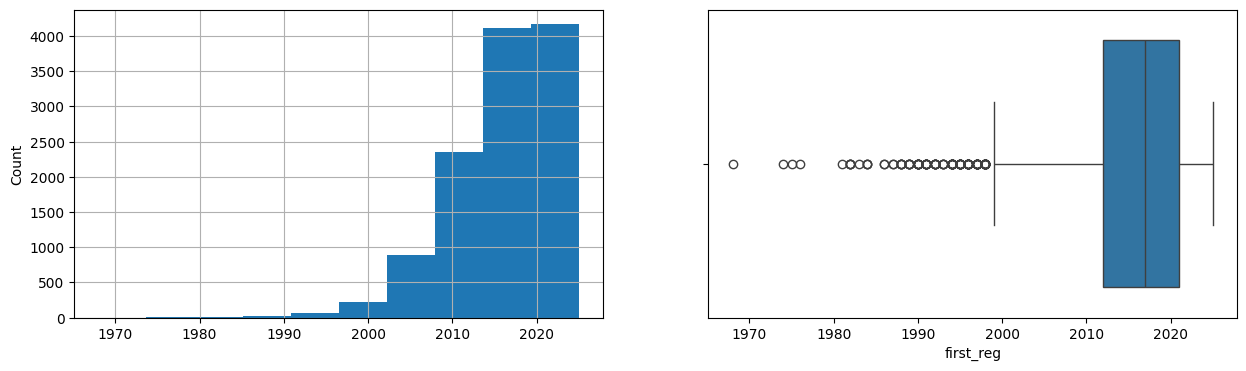

mileage
Skew value: 3.97


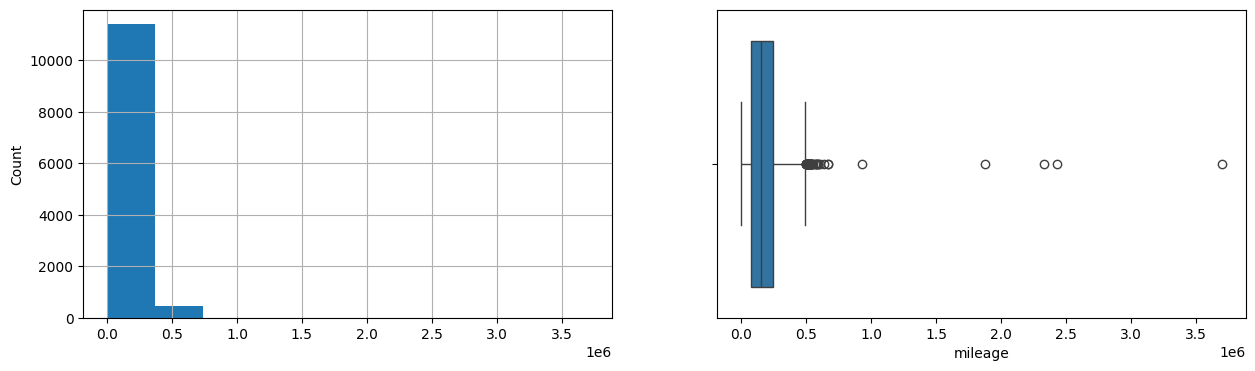

price
Skew value: 4.41


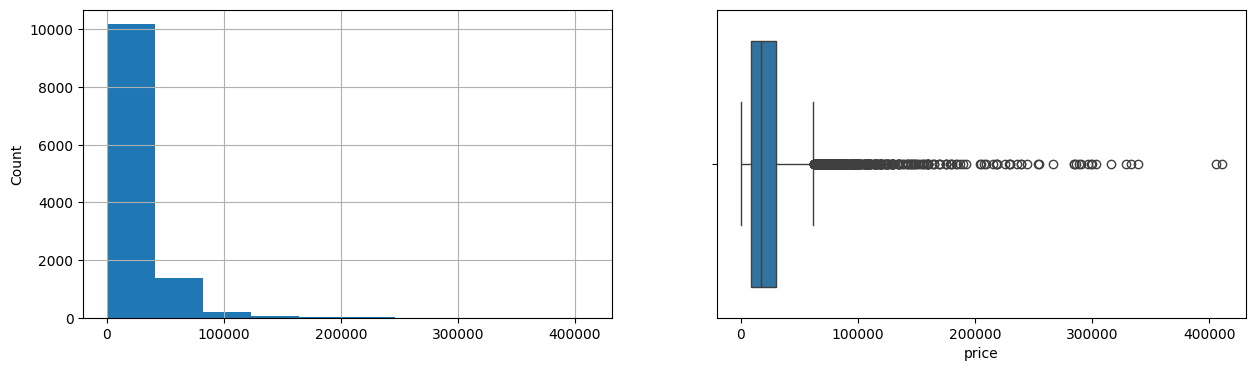

engine_size
Skew value: 10.96


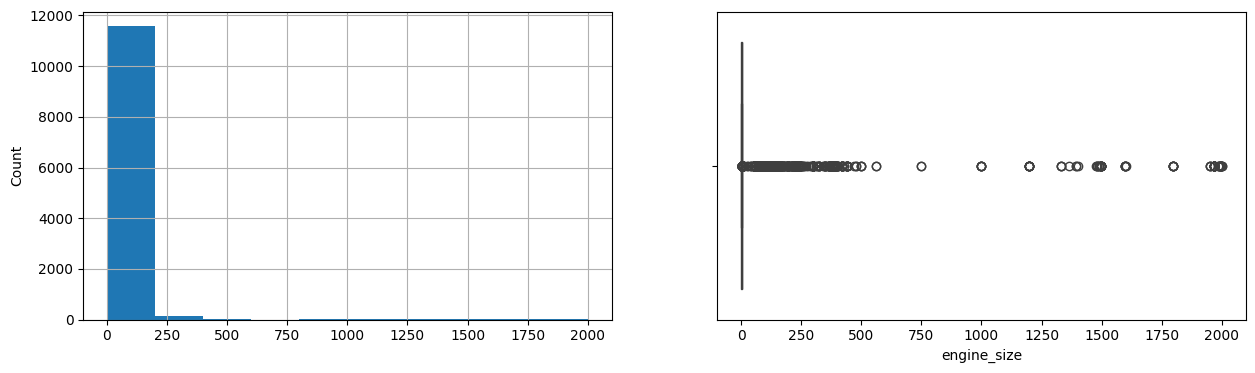

power
Skew value: 1.92


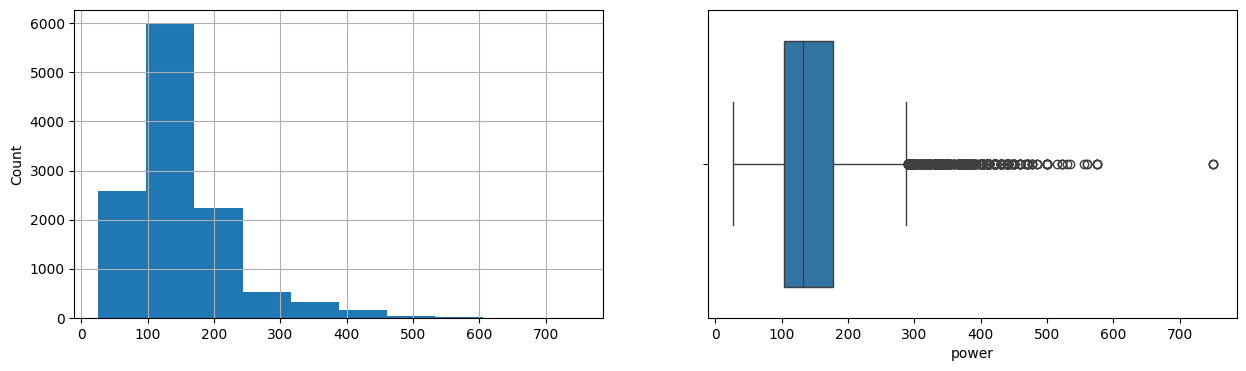

model_group
Skew value: 0.02


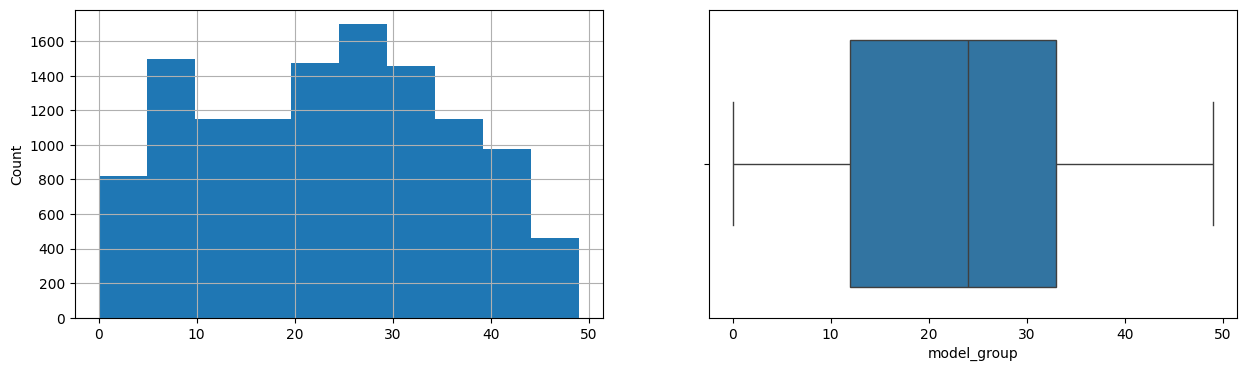

age
Skew value: 1.06


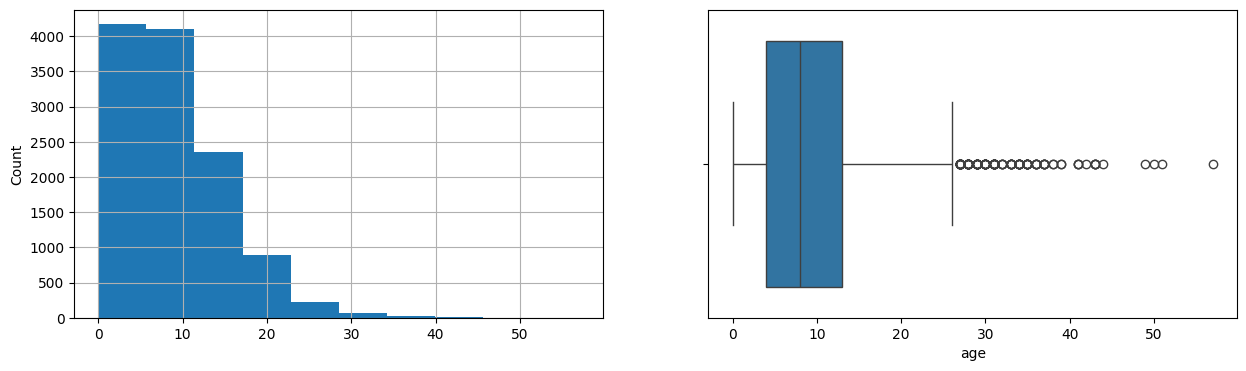

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    print(col)
    print('Skew value:', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

From the visualizations (for skewness) we can see that most of the numerical columns are skewed to either left or right. That means that mostly the values are on one side, but there are also some (few number of) values on the other side (extreme values or outliers). "Model_group" is the only numerical column which basically has no skew and it is probably thanks to grouping "model" column based on average prices and this has helped to balance it.

In [62]:
# we apply transformation to skewed num columns. Trying to transform data. These transformations compress
# the larger values and spread out the smaller values, making the distribution more symmetrical and closer to normal.

df['mileage'] = np.log(df['mileage'])
df['price'] = np.log(df['price'])  # IMPORTANT: we apply log transform to PRICE too (which is our target value, so need to transform it back later to interpret)
df['engine_size'] = np.log(df['engine_size'])
df['power'] = np.log(df['power'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


first_reg
Skew value: -1.06


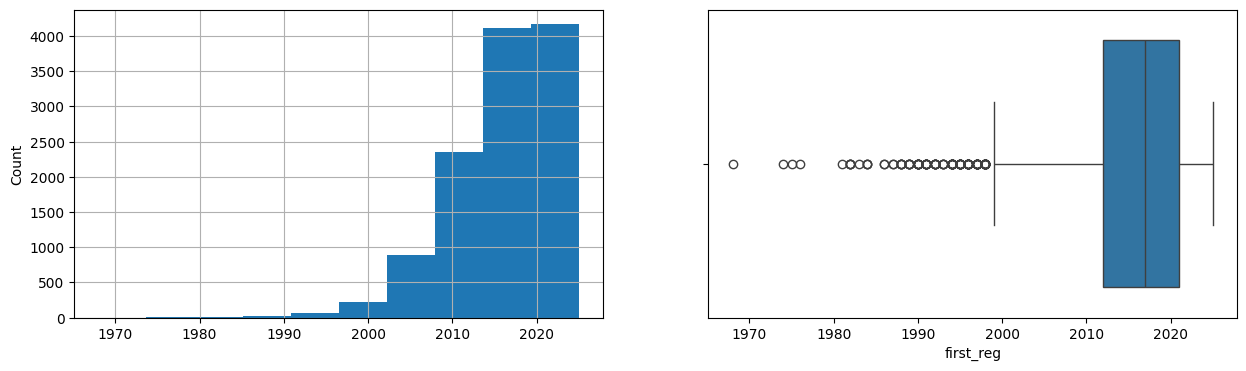

mileage
Skew value: -3.85


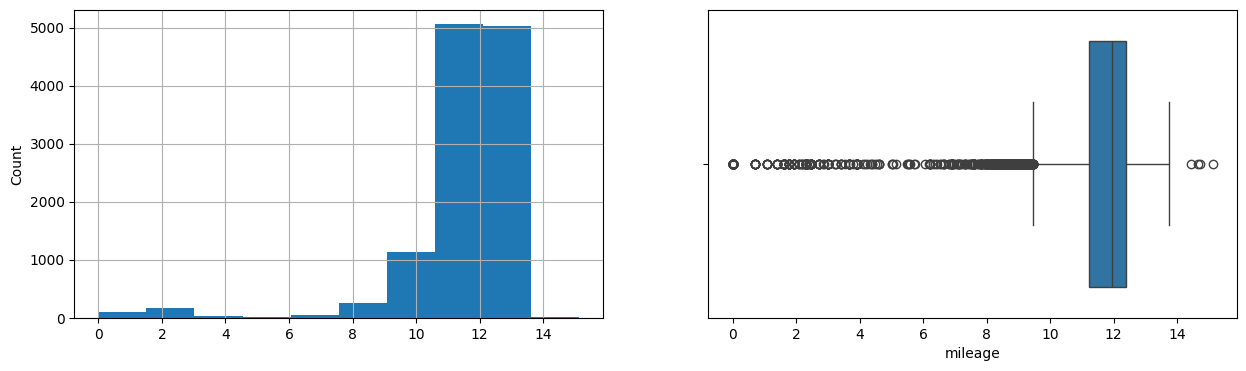

price
Skew value: -0.46


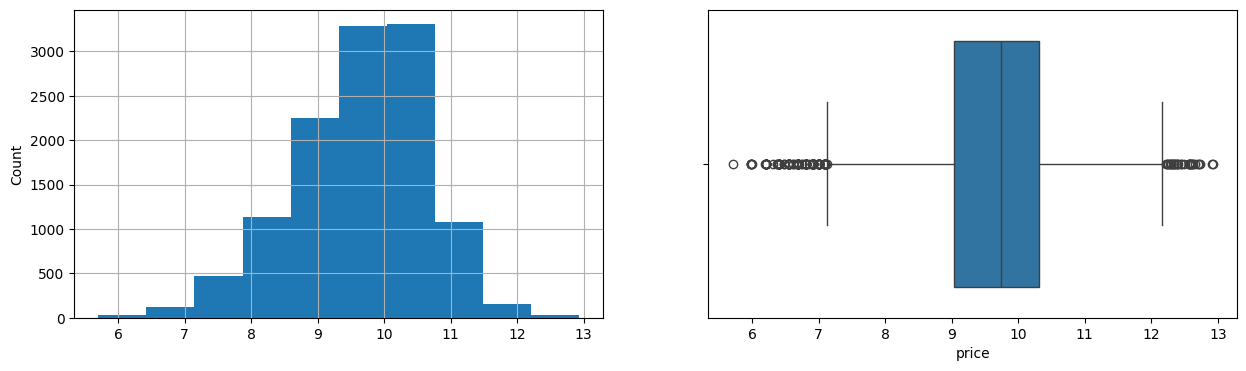

engine_size
Skew value: 3.81


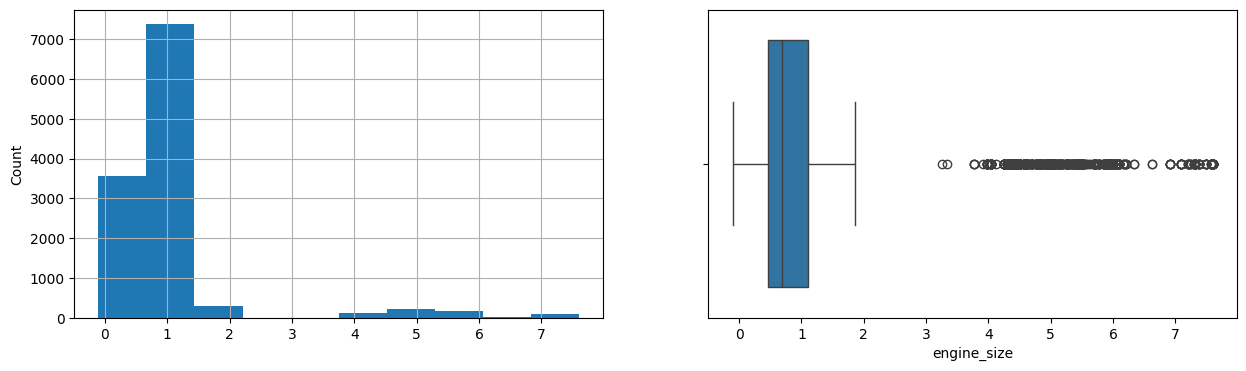

power
Skew value: 0.48


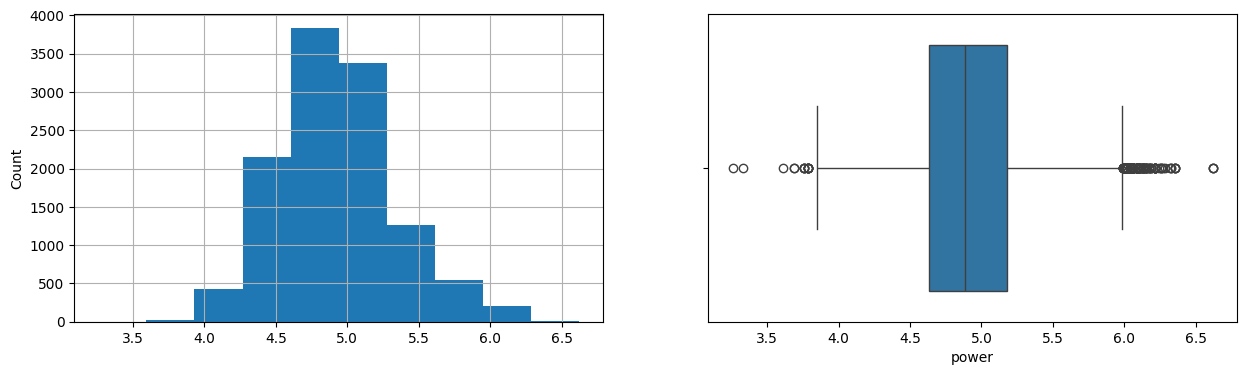

model_group
Skew value: 0.02


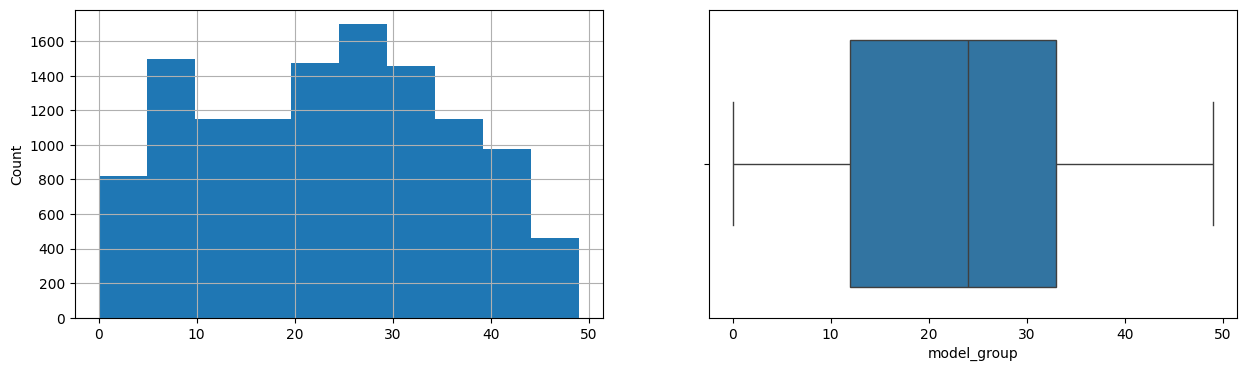

age
Skew value: 1.06


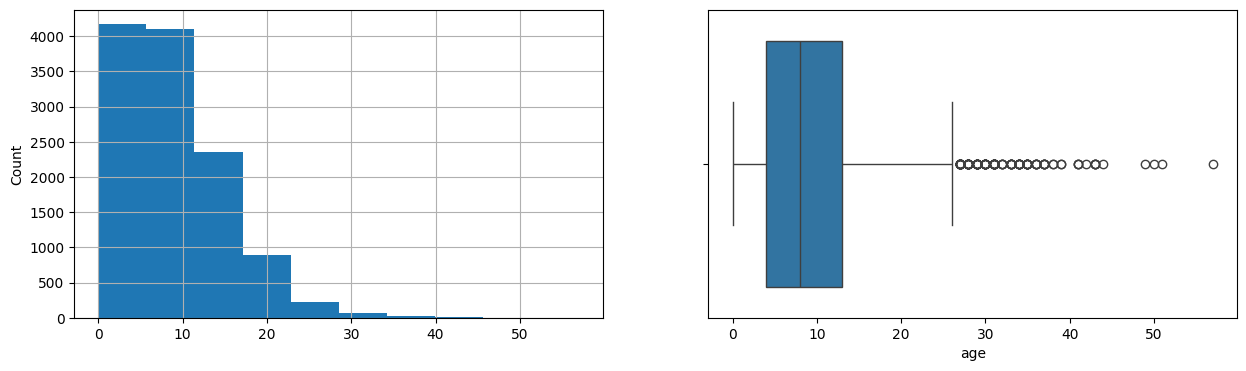

In [53]:
# Plotting num cols distributions again after log transformation. We see that there is lot less skewness now and columns are more balanced
for col in num_cols:
    print(col)
    print('Skew value:', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

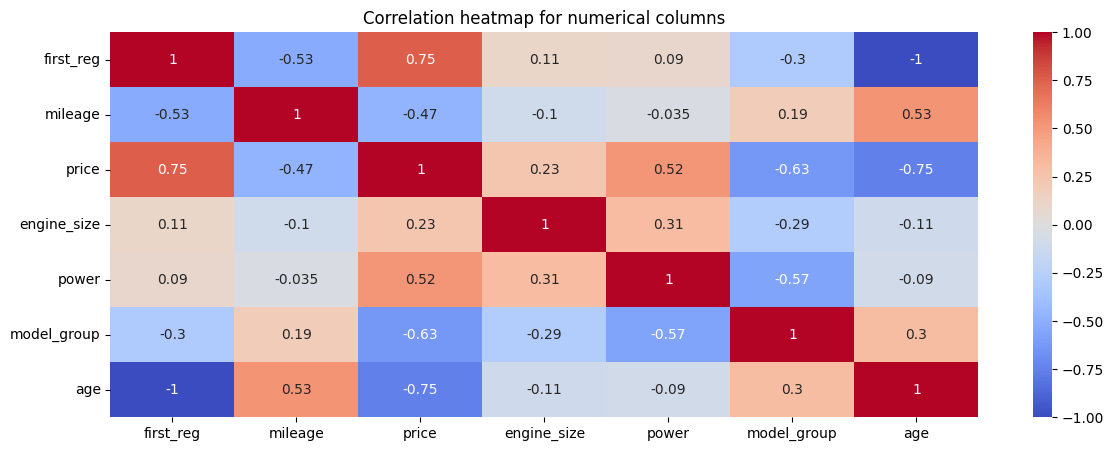

In [54]:
plt.figure(figsize=(14,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation heatmap for numerical columns")
plt.show()

Looking at this correlation heatmap we can do some pretty expected interpretations. For example, mileage and price are negatively correlated (when mileage increases, price decreases). Mileage and age have positive correlation (the higher the mileage, the older the car).

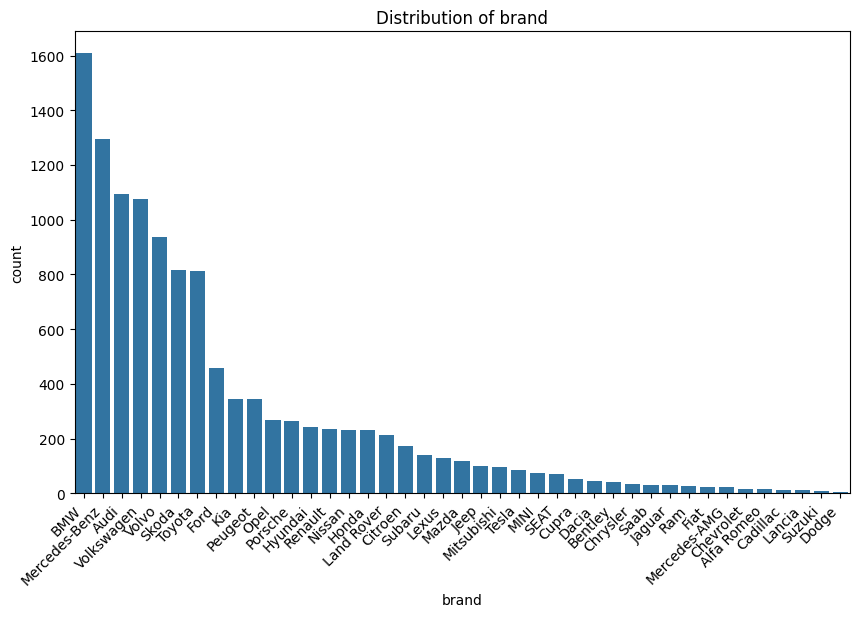

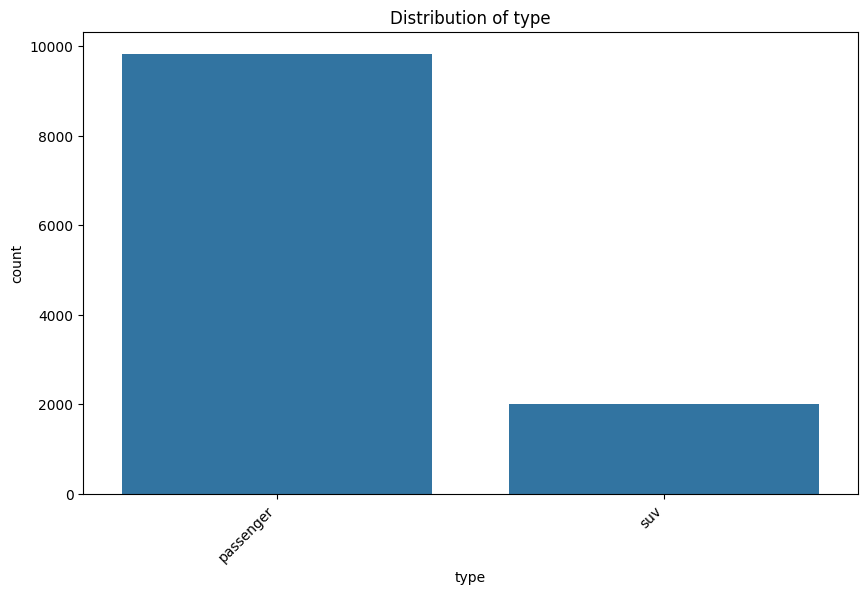

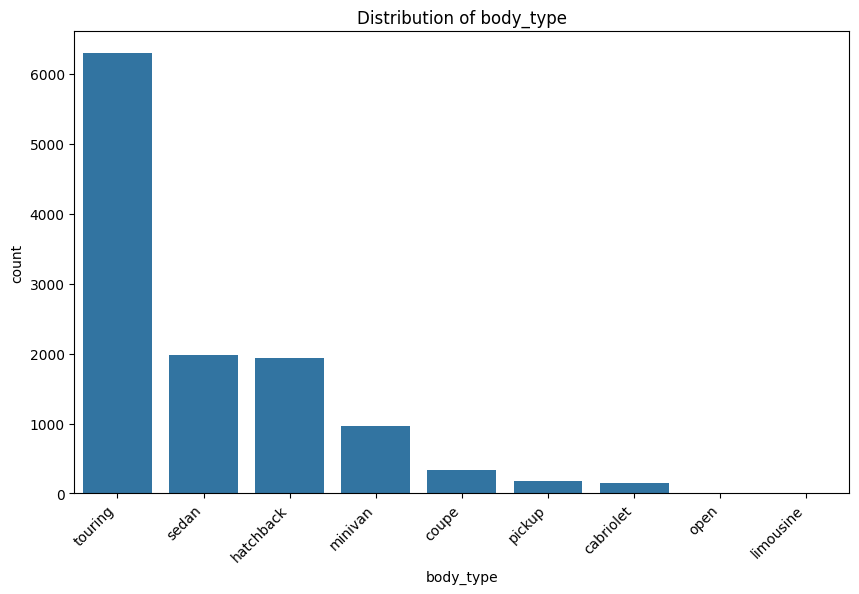

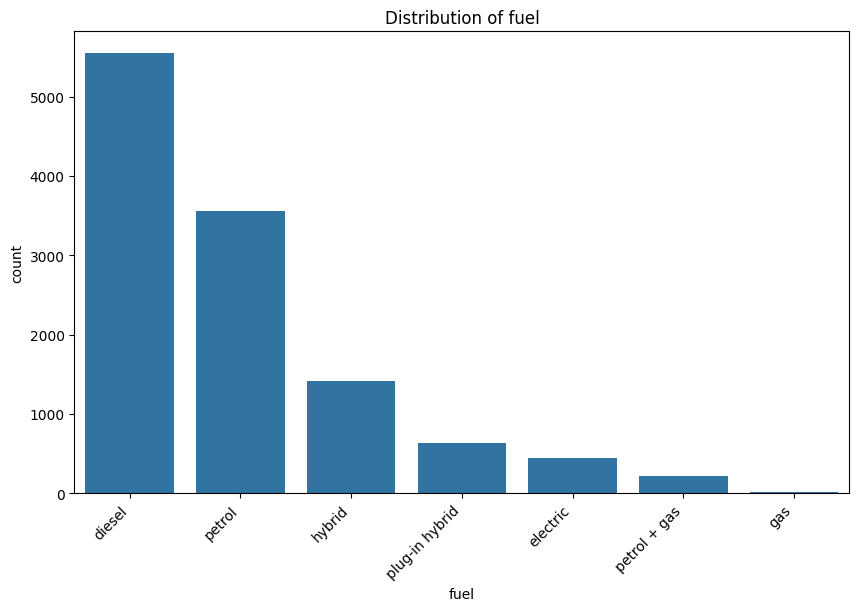

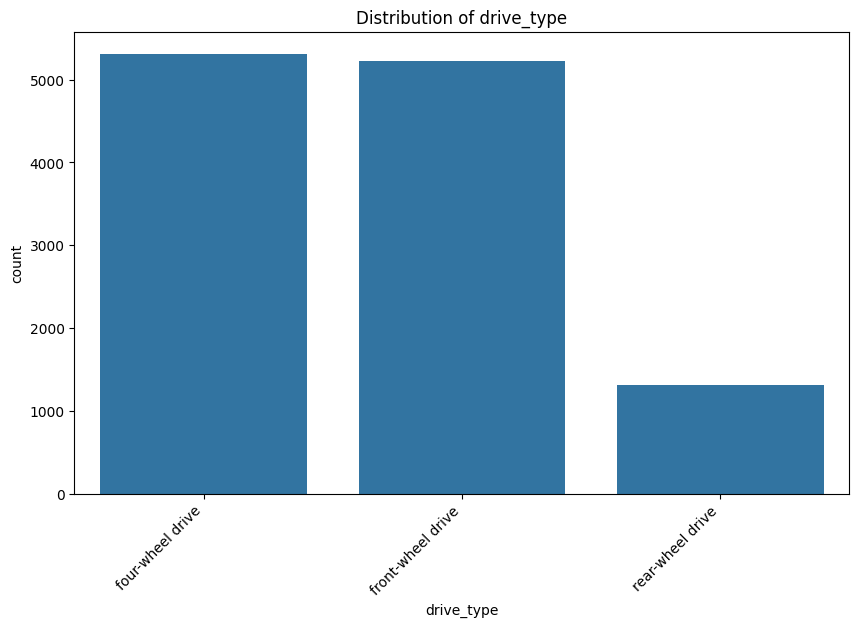

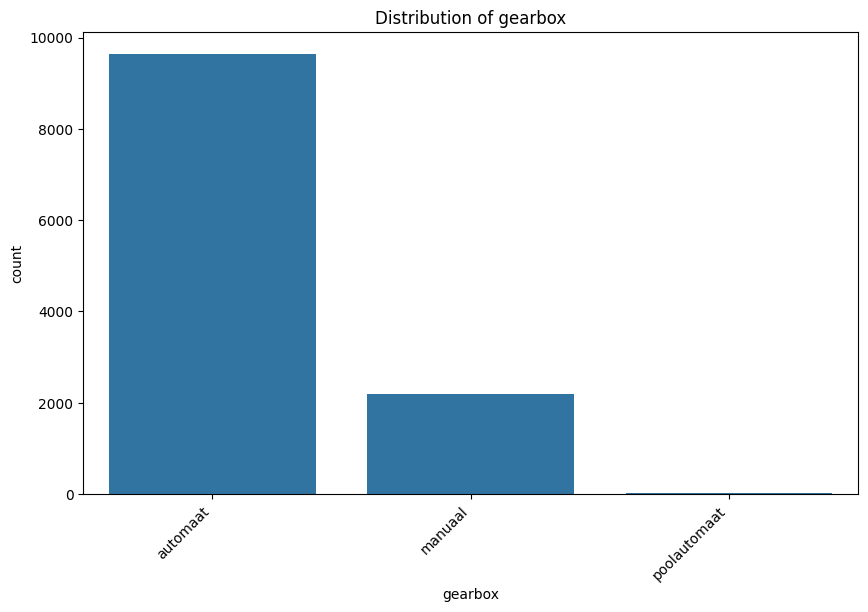

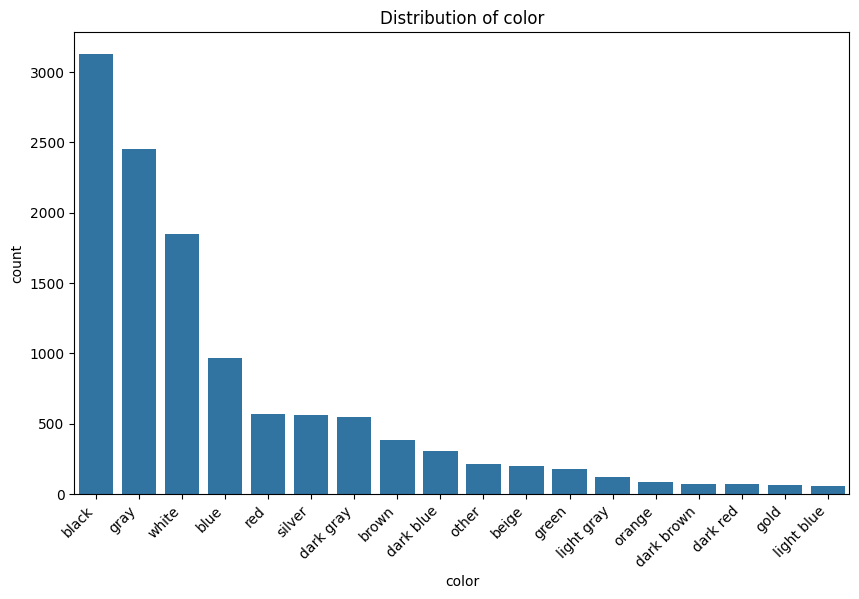

In [63]:
for feature in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

From the distribution plots for categorical columns we can see that many columns have clear dominant values (like color and gearbox, for example). To transform categorical data, we will apply one-hot encoding later.

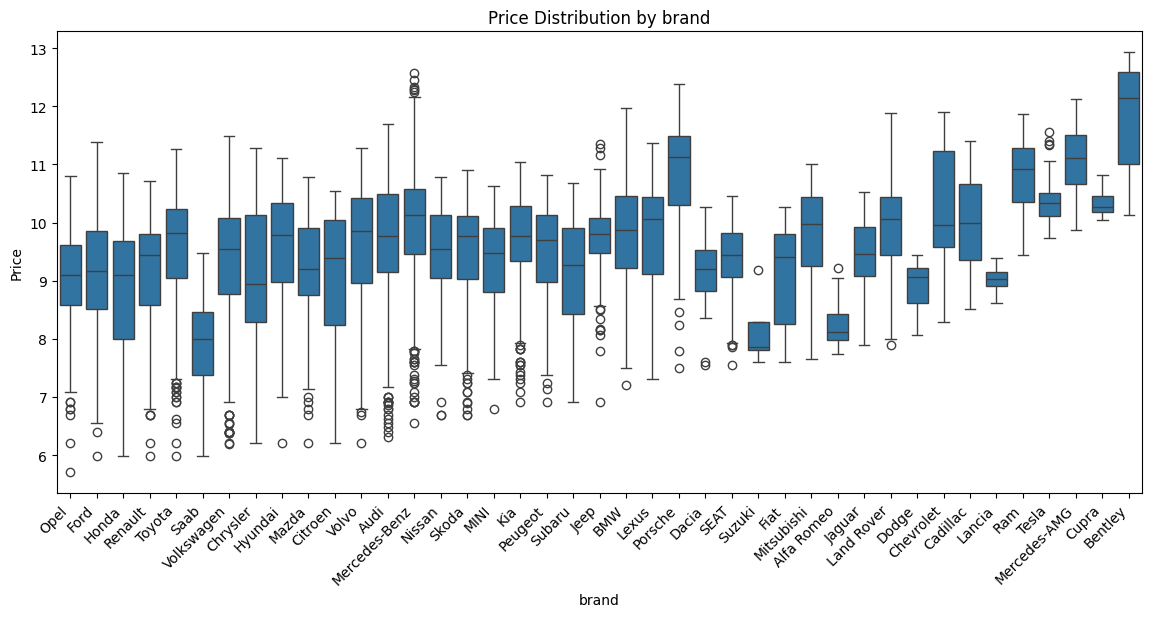

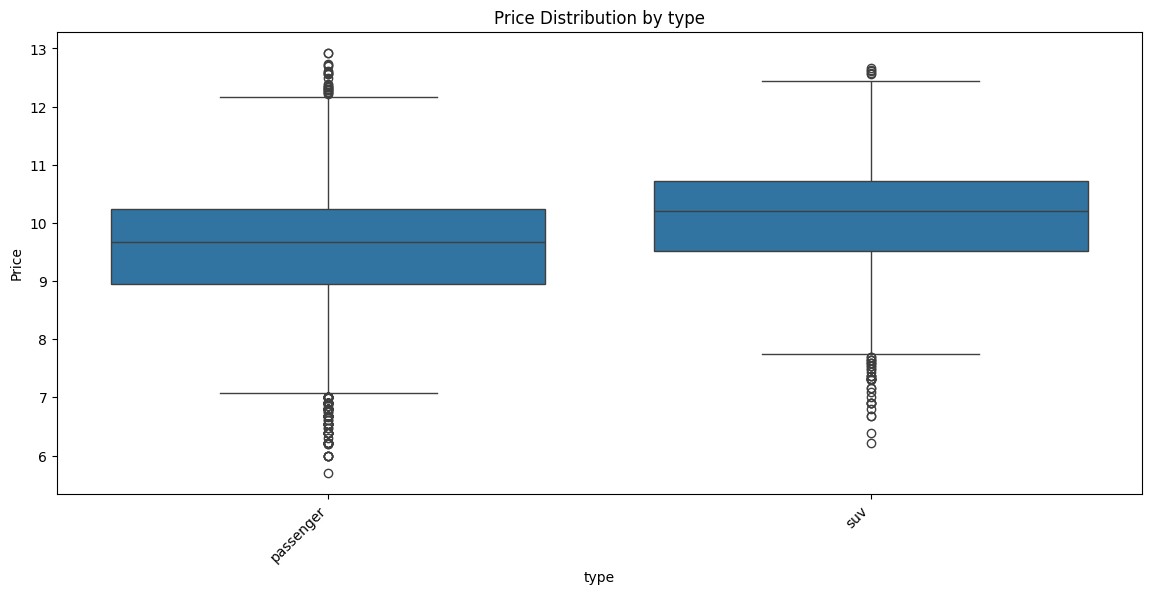

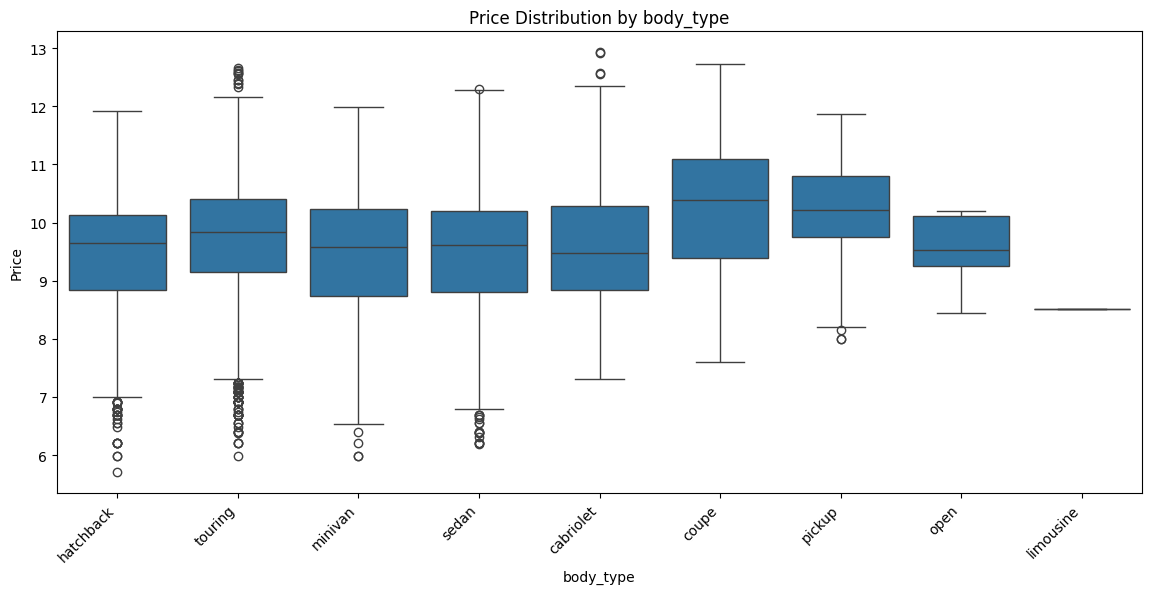

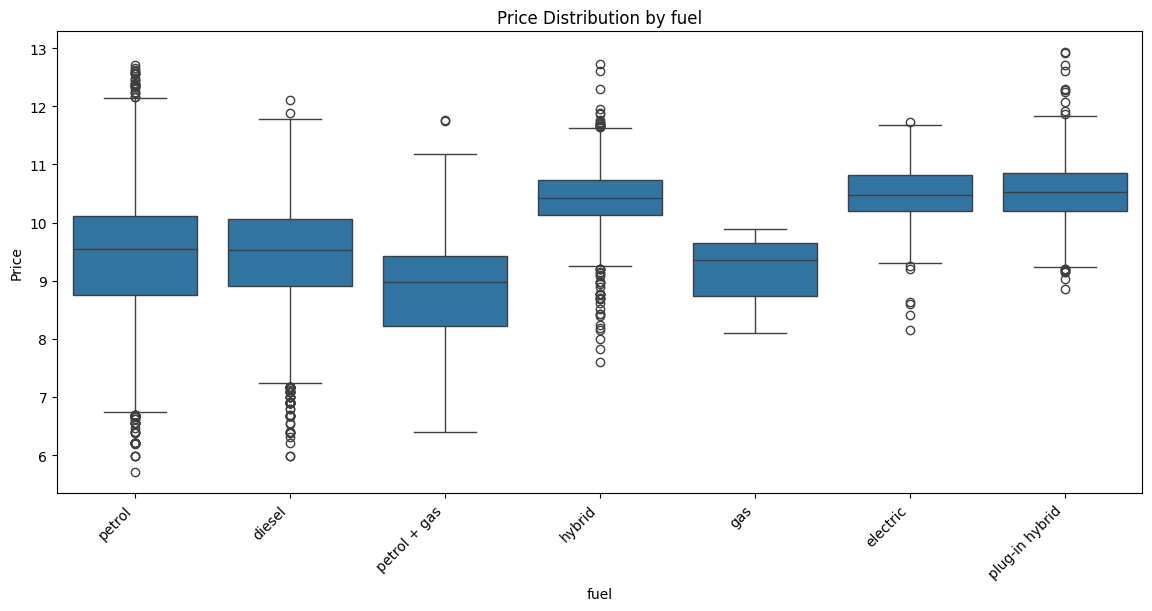

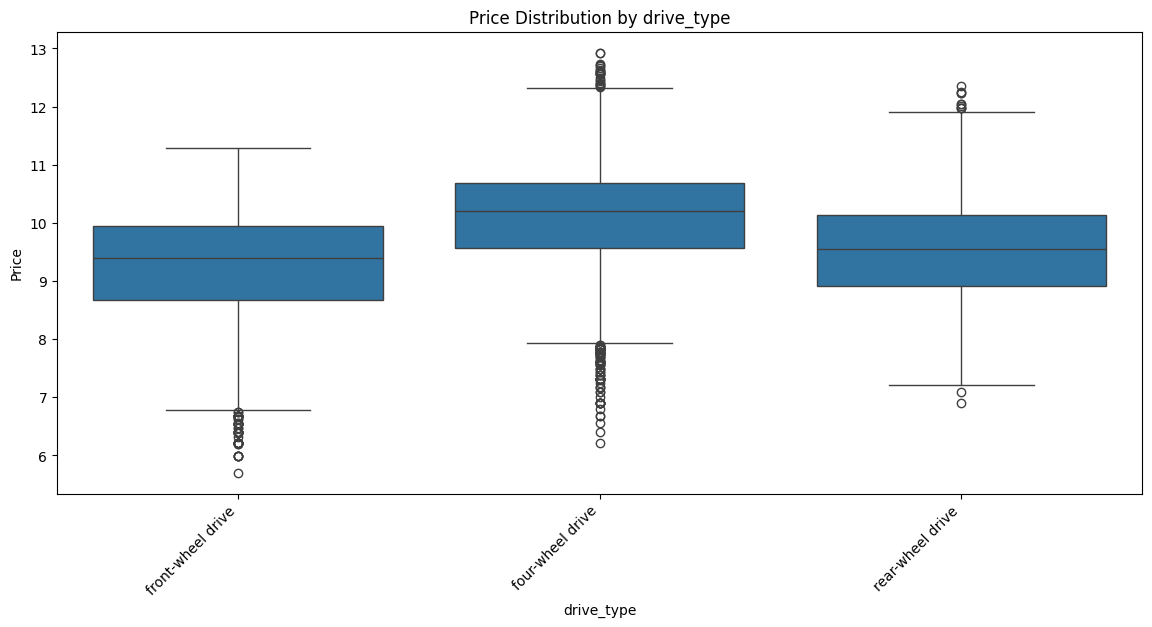

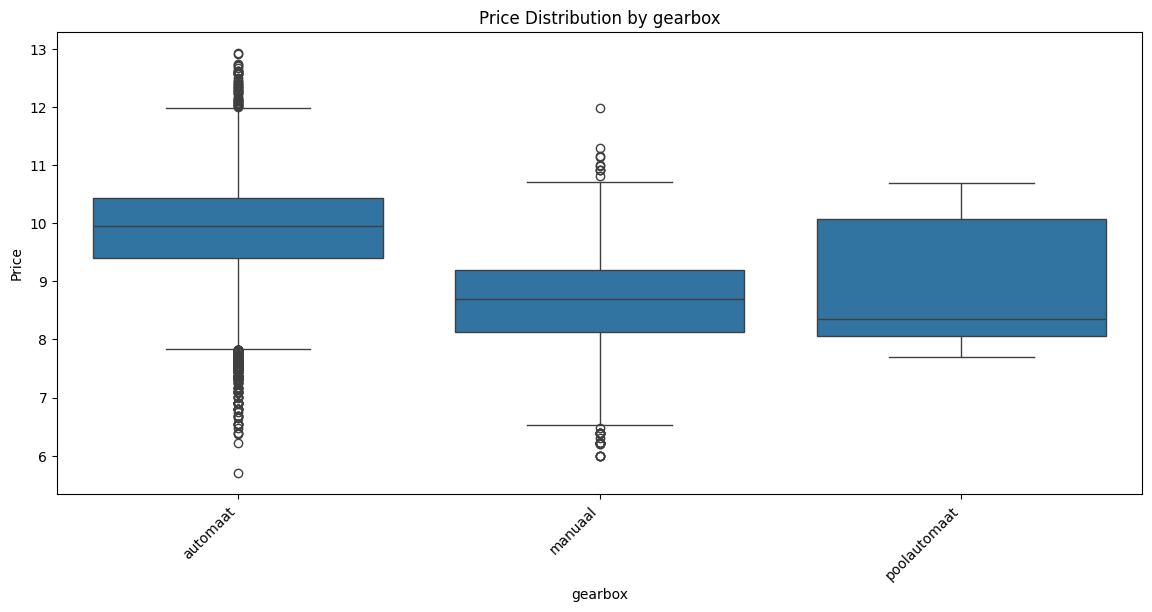

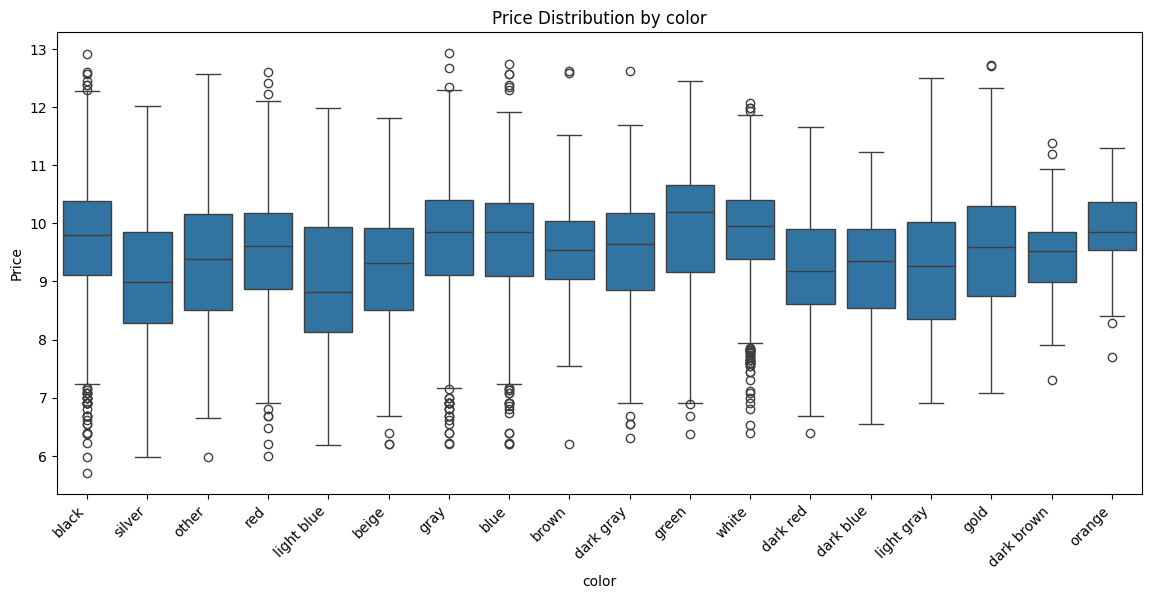

In [56]:
for feature in cat_cols:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df, x=feature, y='price')

    plt.title(f'Price Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

We plot price distribution by each categorical column separately and see that many columns have quite a lot of outliers. Price here on the y-axis is logarithm of the price becuase we did log transformation earlier.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Handle 'model' grouping by average price ---
#group_size = 5
#model_price = df.groupby('model')['price'].mean().sort_values(ascending=False)
#model_groups = {model: i // group_size for i, model in enumerate(model_price.index)}
#df['model_group'] = df['model'].map(model_groups)
#df = df.drop(columns=['model'])

# --- 2. Handle rare colors (group uncommon colors as 'other') ---
# color_counts = df['color'].value_counts()
# rare_colors = color_counts[color_counts < 50].index
# df['color'] = df['color'].replace(rare_colors, 'other')

# --- 3. Separate target and features ---
y = df['price']
X = df.drop(columns=['price'])

# --- 4. Identify categorical and numeric columns ---
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# --- 5. Scale numeric columns ---
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Invert mileage scale (so low mileage = 1, high mileage = 0)
if 'mileage' in X.columns:
    X['mileage'] = 1 - X['mileage']

# --- 6. One-hot encode categorical columns ---
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [58]:
# --- 7. Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [65]:
# --- 8. Train Linear Regression model ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# --- 9. Predict on test set ---
y_pred = lr_model.predict(X_test)

# --- Inverse transform y_test and y_pred back to original price scale ---
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

# --- 10. Evaluate model ---
train_r2 = lr_model.score(X_train, y_train)
test_r2 = lr_model.score(X_test, y_test)

# Calculate MAE and RMSE on original price scale
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
median_price = np.median(y_test_original)

mae_pct = (mae / median_price) * 100
rmse_pct = (rmse / median_price) * 100


## As we did log transformation on our "price" value, we need to transform it back to original value to interpret it:

print(f"Training R² (log-transformed price): {train_r2:.3f}")
print(f"Test R² (log-transformed price): {test_r2:.3f}")
print(f"Median actual price: {median_price:,.2f} euros")
print(f"MAE: {mae:,.2f} euros ({mae_pct:.2f}%)")
print(f"RMSE: {rmse:,.2f} euros ({rmse_pct:.2f}%)")

Training R² (log-transformed price): 0.851
Test R² (log-transformed price): 0.868
Median actual price: 16,990.00 euros
MAE: 4,963.36 euros (29.21%)
RMSE: 10,324.61 euros (60.77%)


Test R squared is a bit higher than training one, so we could say that the model can generalize on test data. MAE could be better (that means, have a lower value), but this is the first model and we could improve data transformation too. For RMSE, this high value can be affected by outliers and we did not focus on outliers so far.

In [60]:
lr_model.coef_

array([ 2.73271538e+00,  7.85748013e-01, -4.45768043e-03,  1.75729654e+00,
       -6.76922910e-01, -2.73271538e+00,  1.45657410e-01,  1.94424572e-01,
        7.06677163e-01,  3.84620451e-01,  7.24026729e-01, -2.16096562e-01,
       -1.77064430e-01, -1.31090707e-01, -3.25188206e-02, -2.20252999e-01,
        6.38640774e-02,  1.65986391e-02,  3.07487375e-02, -6.33644624e-02,
        6.17686790e-02,  2.21528236e-01, -3.64632770e-02,  1.56076098e-01,
        2.54061655e-01,  1.70299427e-01,  1.20187129e-01, -2.16724786e-02,
        4.01327858e-01,  2.87945230e-01,  6.47054139e-02, -3.46781914e-02,
       -9.38071685e-02, -2.33712990e-02,  4.13961196e-01,  4.39306301e-02,
        5.05460169e-03,  2.68619915e-02, -2.35383346e-02,  3.32443860e-02,
       -3.42419105e-02, -3.99686581e-01, -3.10674905e-01,  1.41175696e-01,
        1.46081794e-01,  1.05155852e-01,  2.75891437e-02, -8.76217298e-02,
       -3.76922317e-01,  1.25649336e+00, -2.95028864e-01,  7.50139192e-01,
       -3.09494119e-01, -

In [61]:
df.head()

,brand,first_reg,type,body_type,fuel,mileage,drive_type,gearbox,color,price,engine_size,power,model_group,age
1,Opel,2008,passenger,hatchback,petrol,12.100712,front-wheel drive,automaat,black,5.703782,0.182322,4.077537,41,17
2,Ford,2007,passenger,touring,diesel,12.567237,front-wheel drive,manuaal,silver,5.988961,0.587787,4.442651,43,18
3,Honda,2008,passenger,minivan,petrol,12.904207,front-wheel drive,manuaal,silver,5.988961,0.693147,4.736198,48,17
4,Renault,2001,passenger,hatchback,petrol,12.310433,front-wheel drive,manuaal,other,5.988961,0.336472,4.248495,39,24
5,Toyota,2007,passenger,minivan,diesel,12.945626,front-wheel drive,manuaal,black,5.988961,0.336472,4.189655,24,18
